In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets, model_selection

digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer()

digits_data = digits.data
digits_target = digits.target

(digits_data_train,
 digits_data_test, 
 digits_target_train, 
 digits_target_test) = model_selection.train_test_split(digits_data, 
                                                        digits_target, 
                                                        test_size=0.33, 
                                                        random_state=42)

breast_cancer_data = breast_cancer.data
breast_cancer_target = breast_cancer.target

(breast_cancer_data_train,
 breast_cancer_data_test,
 breast_cancer_target_train, 
 breast_cancer_target_test) = model_selection.train_test_split(breast_cancer_data, 
                                                                breast_cancer_target, 
                                                                test_size=0.3,
                                                                random_state=42)

In [3]:
def train_classifiers(clfs, X_train, y_train, X_test):
    """
    Trains every classifier in clfs, which is a list of classifiers.
    Returns a dict = {classifier_name : classifier} of trained classifiers.
    """
    clfs_trained = {}
    for clf_name in clfs:
        clf = clfs[clf_name]
        clf.fit(X_train, y_train)
        clf.predict(X_test)
        clfs_trained[clf_name] = clf
    return clfs_trained

def get_cross_val_score_means(clfs_trained, X, y, cv):
    """
    Computes cross_val_score mean for every trained classifier.
    Returns a dict = {classifier_name : score_mean}.
    """
    scores = {}
    for clf_trained in clfs_trained:
        clf = clfs_trained[clf_trained]
        score = model_selection.cross_val_score(clf, X, y, cv=cv)
        score_mean = score.mean()
        scores[clf_trained] = score_mean
    return scores

In [4]:
from sklearn import naive_bayes 

clfs = {"Bernoulli" : naive_bayes.BernoulliNB(),
       "Multinomial" : naive_bayes.MultinomialNB(),
       "Gaussian" : naive_bayes.GaussianNB()}

In [5]:
# digits

clfs_trained = train_classifiers(clfs, 
                                 digits_data_train, 
                                 digits_target_train, 
                                 digits_data_test)
get_cross_val_score_means(clfs_trained, digits_data, digits_target, cv=10)

{'Bernoulli': 0.831855746495016,
 'Multinomial': 0.8819396216300838,
 'Gaussian': 0.8103537583567821}

In [6]:
# breast cancer

clfs_trained = train_classifiers(clfs, 
                                 breast_cancer_data_train, 
                                 breast_cancer_target_train, 
                                 breast_cancer_data_test)
get_cross_val_score_means(clfs_trained, breast_cancer_data, breast_cancer_target, cv=10)

{'Bernoulli': 0.6274274047186933,
 'Multinomial': 0.8929349235156856,
 'Gaussian': 0.9386796733212339}

In [7]:
def draw_hist(data):
    """
    Draws 5 hists, which are for the distributions the first 5 features
    """
    df = pd.DataFrame(data)
    for col in pd.DataFrame(data).columns[:5]:
        pd.DataFrame(data)[[col]].hist(color="lightcoral")
        plt.ylabel("number of objects")
        plt.xlabel("feature value")

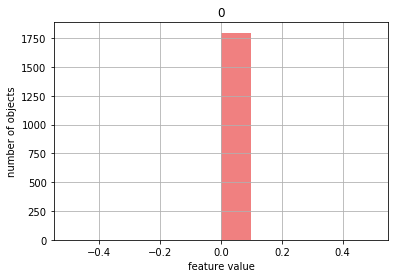

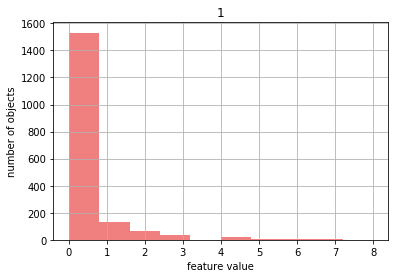

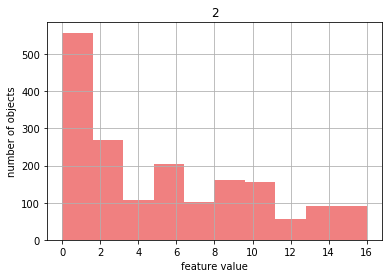

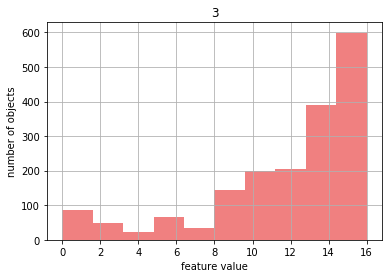

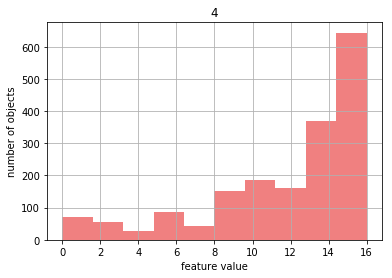

In [8]:
# digits
draw_hist(digits_data)

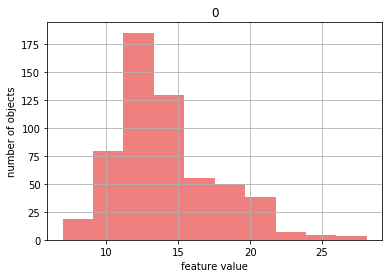

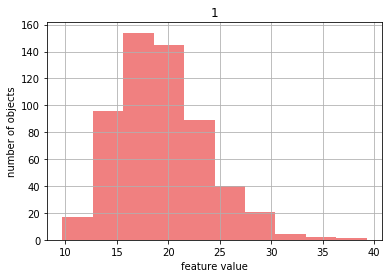

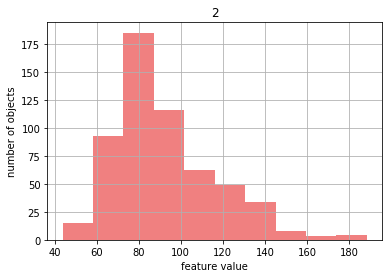

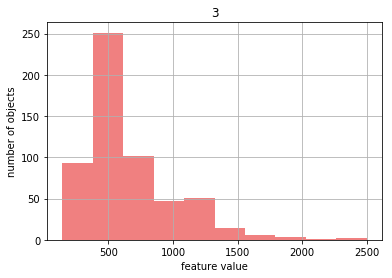

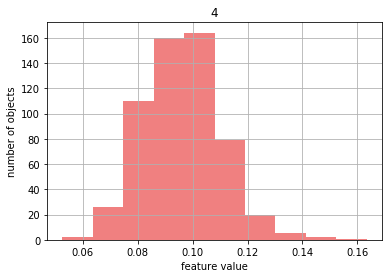

In [9]:
# breast cancer
draw_hist(breast_cancer_data)